<a href="https://colab.research.google.com/github/Aldiiiii/learning-ai-aptika/blob/implementation/Penerapan_AI_Kominfo_Bogor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# Load CSV file
input_csv = "/content/scraped_articles_kota_bogor.csv"
df = pd.read_csv(input_csv)
df.head()


,Title,Content,Date,URL
0,"Wapres Sebut Bansos Lestarikan Kemiskinan, Men...","BOGOR, KOMPAS.com - Menteri Koordinator Bidan...",2024-01-06,http://regional.kompas.com/read/2024/01/06/210...
1,"Menginap di Vila Terbaru JHL Collections, Tari...","KABUPATEN BOGOR, JAWA BARAT - Bertambah satu l...",2024-10-04,http://travel.kompas.com/read/2024/10/04/10080...
2,"Duel Berujung Maut Dua Pria di Bogor, Korban D...",KOMPAS.com - Dua pria terlibat perkelahian ber...,2024-05-01,http://regional.kompas.com/read/2024/05/01/144...
3,"Prakiraan Cuaca di Bogor Hari Ini, 29 Mei 2023...",KOMPAS.com - Berikut ini prakiraan cuaca di Ka...,2023-05-29,http://bandung.kompas.com/read/2023/05/29/0400...
4,"Jadwal Imsakiyah di Bogor Hari Ini, Rabu 12 Ap...","BOGOR, KOMPAS.com - Selamat menjalankan ibadah...",2023-04-12,http://megapolitan.kompas.com/read/2023/04/12/...


# Sentiment Analysis

In [6]:
from transformers import pipeline, AutoTokenizer
import numpy as np
from tqdm import tqdm

model_name = "tabularisai/multilingual-sentiment-analysis"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def split_text(text, max_tokens=512):
    tokens = tokenizer.encode(text, add_special_tokens=False)
    chunks = [tokens[i : i + max_tokens] for i in range(0, len(tokens), max_tokens)]
    return [tokenizer.decode(chunk, skip_special_tokens=True) for chunk in chunks]

sentiment_mapping = {
    "Very Negative": 1,
    "Negative": 2,
    "Neutral": 3,
    "Positive": 4,
    "Very Positive": 5
}

def analyze_full_text_sentiment(text):
    chunks = split_text(text)
    sentiments = [sentiment_pipeline(chunk[:512])[0]['label'] for chunk in chunks]
    sentiment_scores = [sentiment_mapping.get(sent, 3) for sent in sentiments]
    avg_sentiment = round(np.mean(sentiment_scores))
    final_sentiment = next(key for key, value in sentiment_mapping.items() if value == avg_sentiment)
    return final_sentiment

# Applying tqdm to track progress
df["text"] = df["Title"].astype(str) + " " + df["Content"].astype(str)
df["sentiment"] = [analyze_full_text_sentiment(text) for text in tqdm(df["text"], desc="Processing Sentiment")]

Device set to use cuda:0
Processing Sentiment: 100%|██████████| 1000/1000 [00:14<00:00, 70.29it/s]


In [7]:
print(df[["Title", "sentiment"]].head())

                                               Title      sentiment
0  Wapres Sebut Bansos Lestarikan Kemiskinan, Men...       Negative
1  Menginap di Vila Terbaru JHL Collections, Tari...       Positive
2  Duel Berujung Maut Dua Pria di Bogor, Korban D...  Very Negative
3  Prakiraan Cuaca di Bogor Hari Ini, 29 Mei 2023...  Very Positive
4  Jadwal Imsakiyah di Bogor Hari Ini, Rabu 12 Ap...  Very Positive


In [9]:
sample = df.sample(1).iloc[0]
print(f"Text: {sample['text']}\nSentiment: {sample['sentiment']}")

Text: Cerita Pria Curi Sepeda Motor untuk Biaya Istri Lahiran, Bebas Lewat "Restorative Justice" KOMPAS.com - Seorang pria bernama Subur (39) bersimpuh sujud usai dibebaskan dari penjara lewat proses keadilan restoratif atau restorative justice. Subur awalnya ditahan karena mencuri sepeda motor dan terancam hukuman 5 tahun penjara. Kejaksaan Negeri (Kejari) Kabupaten Bogor akhirnya memutuskan untuk membebaskan Subur lewat penyelesaian kekeluargaan, Kamis (15/8/2024). Kasus ini bermula saat pelaku ditangkap saat ketahuan mencuri sepeda motor di depan Apotik, Jalan Raya Narogong, Cileungsi, Kabupaten Bogor, pada Kamis (20/6/2024) lalu. Dia mengaku terpaksa mencuri karena butuh biaya persalinan istrinya di Cileungsi, Kabupaten Bogor, Jawa Barat. Dari pengakuannya, ia sudah mencari pekerjaan di daerah Cileungsi, namun tak kunjung dapat karena dirinya hanya lulusan SD. Dia pun melintas di pinggir jalan melihat motor terparkir dengan kunci masih menempel. Baca juga: Penertiban PKL di Puncak 

In [10]:
output_csv = "news_with_sentiment.csv"
df.to_csv(output_csv, index=False)
print(f"Sentiment analysis completed. Results saved to {output_csv}")

Sentiment analysis completed. Results saved to news_with_sentiment.csv


<ipython-input-11-06b17ddd8ea9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['Date'].dt.year


sentiment  Negative  Neutral  Positive  Very Negative  Very Positive
year                                                                
2020              0        1         1              0              0
2021             15       32        33             23              7
2022             39       55        61             50             36
2023             38       37        54             55             39
2024             57       71        94             99             29
2025             14        5        14             13              1


<Figure size 1200x600 with 0 Axes>

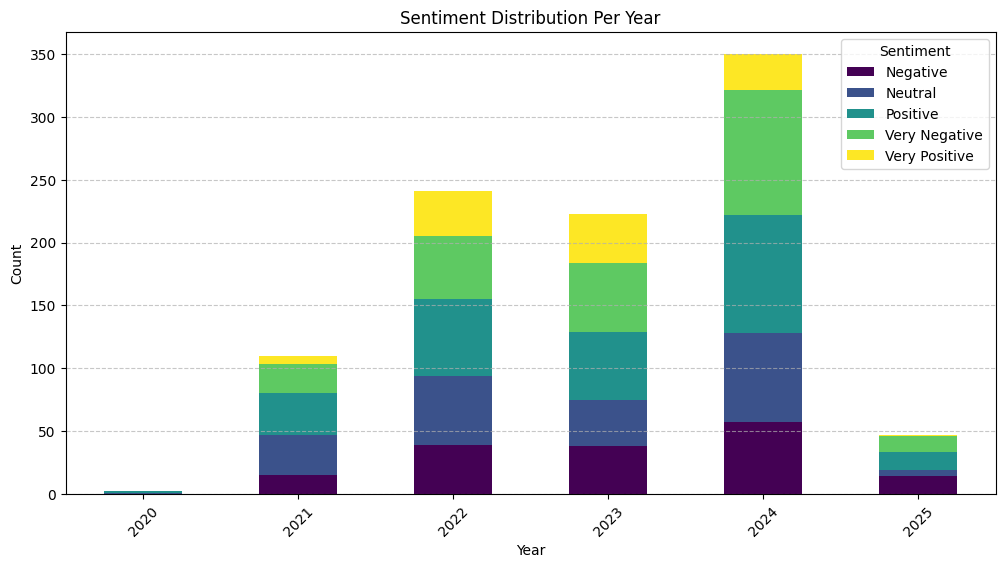

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

df['year'] = df['Date'].dt.year

sentiment_per_year = df.groupby(['year', 'sentiment']).size().unstack().fillna(0).astype(int)

print(sentiment_per_year)

plt.figure(figsize=(12, 6))
sentiment_per_year.plot(kind='bar', stacked=True, colormap="viridis", figsize=(12, 6))

plt.title("Sentiment Distribution Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

#Topic Classification

In [12]:
df_classification = df[0:10]

In [15]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm
import logging

tokenizer = AutoTokenizer.from_pretrained("WebOrganizer/TopicClassifier-NoURL")
model = AutoModelForSequenceClassification.from_pretrained(
    "WebOrganizer/TopicClassifier-NoURL",
    trust_remote_code=True,
    use_memory_efficient_attention=False
)

labels = [
    "Adult", "Art & Design", "Software Dev.", "Crime & Law", "Education & Jobs",
    "Hardware", "Entertainment", "Social Life", "Fashion & Beauty", "Finance & Business",
    "Food & Dining", "Games", "Health", "History", "Home & Hobbies", "Industrial",
    "Literature", "Politics", "Religion", "Science & Tech.", "Software", "Sports & Fitness",
    "Transportation", "Travel"
]

# Function for classification
def classify_text(text):
    inputs = tokenizer([text], return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    probs = outputs.logits.softmax(dim=-1)
    category_idx = probs.argmax(dim=-1).item()
    return labels[category_idx]

In [16]:
print("Starting classification...")
df_classification["category"] = [classify_text(text) for text in tqdm(df_classification["text"], desc="Classifying")]

print("Classification completed.")

Starting classification...


Classifying: 100%|██████████| 10/10 [00:17<00:00,  1.74s/it]

Classification completed.



<ipython-input-16-f01716f2701e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_classification["category"] = [classify_text(text) for text in tqdm(df_classification["text"], desc="Classifying")]


In [18]:
sample = df_classification.sample(1).iloc[0]
print(f"Text: {sample['text']}\ntopic: {sample['category']}")

Text: Prakiraan Cuaca Bogor Hari Ini Selasa 11 Juni 2024, dan Besok : Siang ini Hujan Sedang Bogor, KOMPAS.com - Halaman ini memuat informasi prakiraan cuaca Bogor, Jawa Barat, untuk hari ini Selasa 11 Juni 2024 dan besok Rabu 12 Juni 2024. Silakan simpan halaman ini untuk mengetahui prakiraan cuaca Bogor. Jangan ke luar rumah sebelum Anda baca artikel ini. Data prakiraan cuaca diambil dari BMKG.go.id Prakiraan Cuaca Bogor Hari Ini Per Jam Selasa 11 Juni 2024 Prakiraan Cuaca Bogor Besok Rabu 12 Juni 2024 Di Indonesia, informasi prakiraan cuaca setiap daerah dikeluarkan oleh Badan Meteorologi, Klimatologi dan Geofisika (BMKG). Setiap pagi, kita bisa melihat informasi perkiraan cuaca yang dikeluarkan BMKG. Prakiraan cuaca dilakukan oleh seorang forecaster (prakirawan cuaca) Pembuatan prakiraan cuaca juga dibantu dengan teknologi pemodelan prediksi cuaca berbasis komputer yakni model Numerical Weather Prediction (NWP).
topic: Science & Tech.


#Chatbot


In [ ]:
import torch
from transformers import pipeline
from transformers.utils import logging
logging.set_verbosity_error()


def generate_response(message):
    model_id = "meta-llama/Llama-3.2-1B-Instruct"
    pipe = pipeline(
        "text-generation",
        model=model_id,
        torch_dtype=torch.bfloat16,
        device_map="cuda",
    )

    messages = [
        {"role": "system", "content": "Kamu adalah chatbot yang membantu pengguna menyelesaikan keluhan mereka dengan solusi yang informatif dan ramah."},
        {"role": "user", "content": message},
    ]

    outputs = pipe(messages, max_new_tokens=256, pad_token_id=128001)

    print(outputs[0]["generated_text"][-1]['content'])




In [ ]:
user_input = input("Enter your message: ")
generate_response(user_input)

#Text-Similarity


In [53]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine
from typing import List, Dict, Set
from datetime import datetime

class ComplaintGroupingSystem:
    def __init__(self, model_name: str = "HIT-TMG/KaLM-embedding-multilingual-mini-v1"):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name)
        self.model.eval()
        self.groups = {}
        self.next_group_id = 1

    def get_embedding(self, text: str) -> np.ndarray:
        """Generate embedding for text"""
        inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = self.model(**inputs)
        return outputs.last_hidden_state.mean(dim=1).numpy().flatten()

    def calculate_similarity(self, text1: str, text2: str) -> float:
        """Calculate similarity between two texts"""
        emb1 = self.get_embedding(text1)
        emb2 = self.get_embedding(text2)
        return 1 - cosine(emb1, emb2)

    def initialize_groups(self,
                         complaints_df: pd.DataFrame,
                         threshold: float = 0.6,
                         desc_weight: float = 0.4,
                         loc_weight: float = 0.6) -> Dict:
        """
        Initialize complaint groups from existing data

        Parameters:
        complaints_df: DataFrame with 'deskripsi' and 'lokasi' columns
        threshold: Minimum similarity score to be considered similar
        desc_weight: Weight for description similarity
        loc_weight: Weight for location similarity
        """
        self.groups = {}
        self.next_group_id = 1

        # Process each complaint
        for idx, row in complaints_df.iterrows():
            complaint_data = {
                'id': idx,
                'deskripsi': row['deskripsi'],
                'lokasi': row['lokasi'],
                'timestamp': datetime.now().isoformat() if 'timestamp' not in row else row['timestamp']
            }
            self.process_new_complaint(complaint_data, threshold, desc_weight, loc_weight)

        return self.get_groups_summary()

    def process_new_complaint(self,
                            complaint: Dict,
                            threshold: float = 0.6,
                            desc_weight: float = 0.4,
                            loc_weight: float = 0.6) -> Dict:
        """
        Process a new complaint and either add it to an existing group or create a new group

        Parameters:
        complaint: Dict with 'id', 'deskripsi', 'lokasi', and optional 'timestamp'
        """
        best_group = None
        best_similarity = 0

        for group_id, group_data in self.groups.items():
            for existing_complaint in group_data['complaints']:
                desc_sim = self.calculate_similarity(
                    complaint['deskripsi'],
                    existing_complaint['deskripsi']
                )
                loc_sim = self.calculate_similarity(
                    complaint['lokasi'],
                    existing_complaint['lokasi']
                )

                weighted_sim = (desc_weight * desc_sim) + (loc_weight * loc_sim)

                if weighted_sim >= threshold and weighted_sim > best_similarity:
                    best_similarity = weighted_sim
                    best_group = group_id

        if best_group is not None:
            self.groups[best_group]['complaints'].append(complaint)
            self.groups[best_group]['count'] += 1
            return {
                'status': 'Added to Existing Group',
                'group_id': best_group,
                'similarity_score': best_similarity
            }
        else:
            new_group_id = self.next_group_id
            self.groups[new_group_id] = {
                'complaints': [complaint],
                'count': 1,
                'created_at': datetime.now().isoformat()
            }
            self.next_group_id += 1
            return {
                'status': 'Created New Group',
                'group_id': new_group_id,
                'similarity_score': 1.0
            }

    def get_groups_summary(self) -> pd.DataFrame:
        """Get summary of all complaint groups"""
        summaries = []

        for group_id, group_data in self.groups.items():
            complaints = group_data['complaints']
            summaries.append({
                'group_id': group_id,
                'complaint_count': len(complaints),
                'sample_description': complaints[0]['deskripsi'],
                'sample_location': complaints[0]['lokasi'],
                'locations': set(c['lokasi'] for c in complaints),
                'latest_complaint': max(c.get('timestamp', '') for c in complaints),
                'complaint_ids': [c['id'] for c in complaints]
            })

        return pd.DataFrame(summaries)


In [54]:
sample_complaints = pd.DataFrame({
    'deskripsi': [
        'Jalan berlubang di depan pasar perlu perbaikan segera',
        'Banyak lubang di jalan membahayakan pengendara',
        'Lampu PJU mati di sepanjang jalan utama',
        'Lampu jalan tidak menyala sejak kemarin',
        'Sampah menumpuk dan berbau di pinggir jalan',
        'Tumpukan sampah belum diangkut 3 hari'
    ],
    'lokasi': [
        'Pasar Bogor',
        'Depan Pasar Bogor',
        'Jalan Pajajaran',
        'Jalan Pajajaran',
        'Taman Kota',
        'Taman Kota'
    ]
})


system = ComplaintGroupingSystem()

print("Initializing groups with existing data...")
groups_summary = system.initialize_groups(sample_complaints)
print("\nInitial Groups:")
display(groups_summary)



tokenizer_config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/370 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

Initializing groups with existing data...

Initial Groups:


,group_id,complaint_count,sample_description,sample_location,locations,latest_complaint,complaint_ids
0,1,2,Jalan berlubang di depan pasar perlu perbaikan...,Pasar Bogor,"{Depan Pasar Bogor, Pasar Bogor}",2025-02-24T08:21:08.202778,"[0, 1]"
1,2,2,Lampu PJU mati di sepanjang jalan utama,Jalan Pajajaran,{Jalan Pajajaran},2025-02-24T08:21:13.193676,"[2, 3]"
2,3,2,Sampah menumpuk dan berbau di pinggir jalan,Taman Kota,{Taman Kota},2025-02-24T08:21:27.505853,"[4, 5]"


In [55]:
new_complaint = {
    'id': '6',
    'deskripsi': 'Jalan rusak dan berlubang perlu diperbaiki',
    'lokasi': 'Sekitar Pasar Bogor',
    'timestamp': datetime.now().isoformat()
}

print("\nProcessing new complaint...")
result = system.process_new_complaint(new_complaint)
print(f"Result: {result}")

print("\nUpdated Groups:")
display(system.get_groups_summary())


Processing new complaint...
Result: {'status': 'Added to Existing Group', 'group_id': 1, 'similarity_score': 0.8792746985312156}

Updated Groups:


,group_id,complaint_count,sample_description,sample_location,locations,latest_complaint,complaint_ids
0,1,3,Jalan berlubang di depan pasar perlu perbaikan...,Pasar Bogor,"{Depan Pasar Bogor, Sekitar Pasar Bogor, Pasar...",2025-02-24T08:22:27.786049,"[0, 1, 6]"
1,2,2,Lampu PJU mati di sepanjang jalan utama,Jalan Pajajaran,{Jalan Pajajaran},2025-02-24T08:21:13.193676,"[2, 3]"
2,3,2,Sampah menumpuk dan berbau di pinggir jalan,Taman Kota,{Taman Kota},2025-02-24T08:21:27.505853,"[4, 5]"
